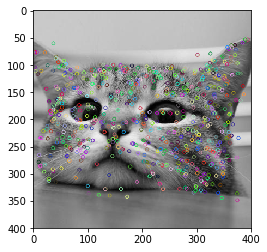

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mycat.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp, None)

plt.imshow(img)
plt.show()

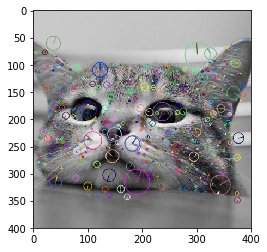

In [70]:
img = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)
plt.show()

In [84]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('sanmol.jpg',0) 
img2 = cv2.imread('sanmol-foto.jpg',0) 

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matches[:20]

[[<DMatch 000001DC8A8040D0>, <DMatch 000001DC8A7A64B0>],
 [<DMatch 000001DC8A7A6530>, <DMatch 000001DC8A7A64D0>],
 [<DMatch 000001DC825CB3F0>, <DMatch 000001DC8A858CD0>],
 [<DMatch 000001DC8A858BF0>, <DMatch 000001DC8A858CB0>],
 [<DMatch 000001DC8A8588B0>, <DMatch 000001DC8A858B90>],
 [<DMatch 000001DC8A858830>, <DMatch 000001DC8A858870>],
 [<DMatch 000001DC8A8584B0>, <DMatch 000001DC8A858850>],
 [<DMatch 000001DC8A858810>, <DMatch 000001DC8A858270>],
 [<DMatch 000001DC8A8587D0>, <DMatch 000001DC8A8586B0>],
 [<DMatch 000001DC8A858CF0>, <DMatch 000001DC8A858D10>],
 [<DMatch 000001DC8A858D30>, <DMatch 000001DC8A858D50>],
 [<DMatch 000001DC8A858D70>, <DMatch 000001DC8A858D90>],
 [<DMatch 000001DC8A858DB0>, <DMatch 000001DC8A858DD0>],
 [<DMatch 000001DC8A858DF0>, <DMatch 000001DC8A858E10>],
 [<DMatch 000001DC8A858E30>, <DMatch 000001DC8A858E50>],
 [<DMatch 000001DC8A858E70>, <DMatch 000001DC8A858E90>],
 [<DMatch 000001DC8A858EB0>, <DMatch 000001DC8A858ED0>],
 [<DMatch 000001DC8A858EF0>, <D

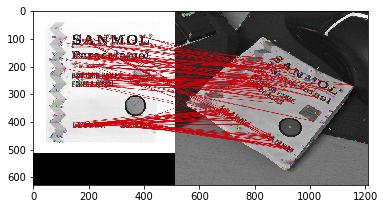

(<matplotlib.image.AxesImage at 0x1dc8a8c3860>, None)

In [85]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (200,0,10),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()